<a href="https://colab.research.google.com/github/Tom-Kingg/Binary-Classification-of-Breast-Cancer-Dataset/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Project: Breast Cancer Classification using Random Forest

In [1]:
# This is a project for learning purpose .
# You can  start with me as this project can be a Kick-Start.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [3]:
# Here we have loaded all the libraries which we need right now

In [4]:
# Now let's move on towards the dataset

In [5]:
# from UCI site we will be importing dataset

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
Y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [6]:
print("Shape of X:", X.shape)
print("Shape of y:", Y.shape)
# Checking the shapes of the data

Shape of X: (569, 30)
Shape of y: (569, 1)


In [7]:
print(X.isnull().sum())
print(Y.isnull().sum())


radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64
Diagnosis    0
dtype: int64


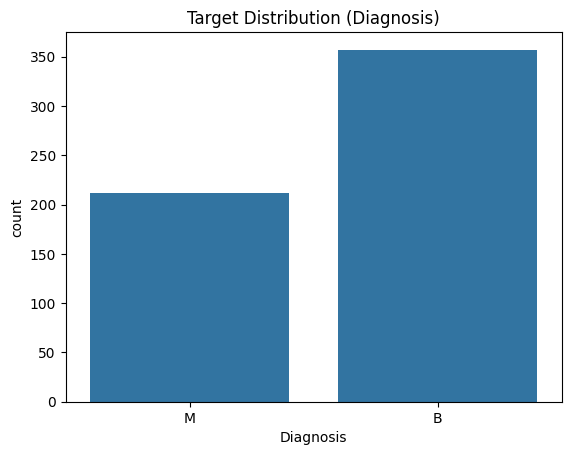

In [8]:
sns.countplot(x = "Diagnosis" , data = Y )
plt.title("Target Distribution (Diagnosis)")
plt.show()

# 💡 This tells you if the dataset is imbalanced (more benign or malignant cases).



In [9]:
df = pd.concat([X,Y] , axis=1)

df['Diagnosis'] = df['Diagnosis'].map({'M': 0  , 'B' : 1})

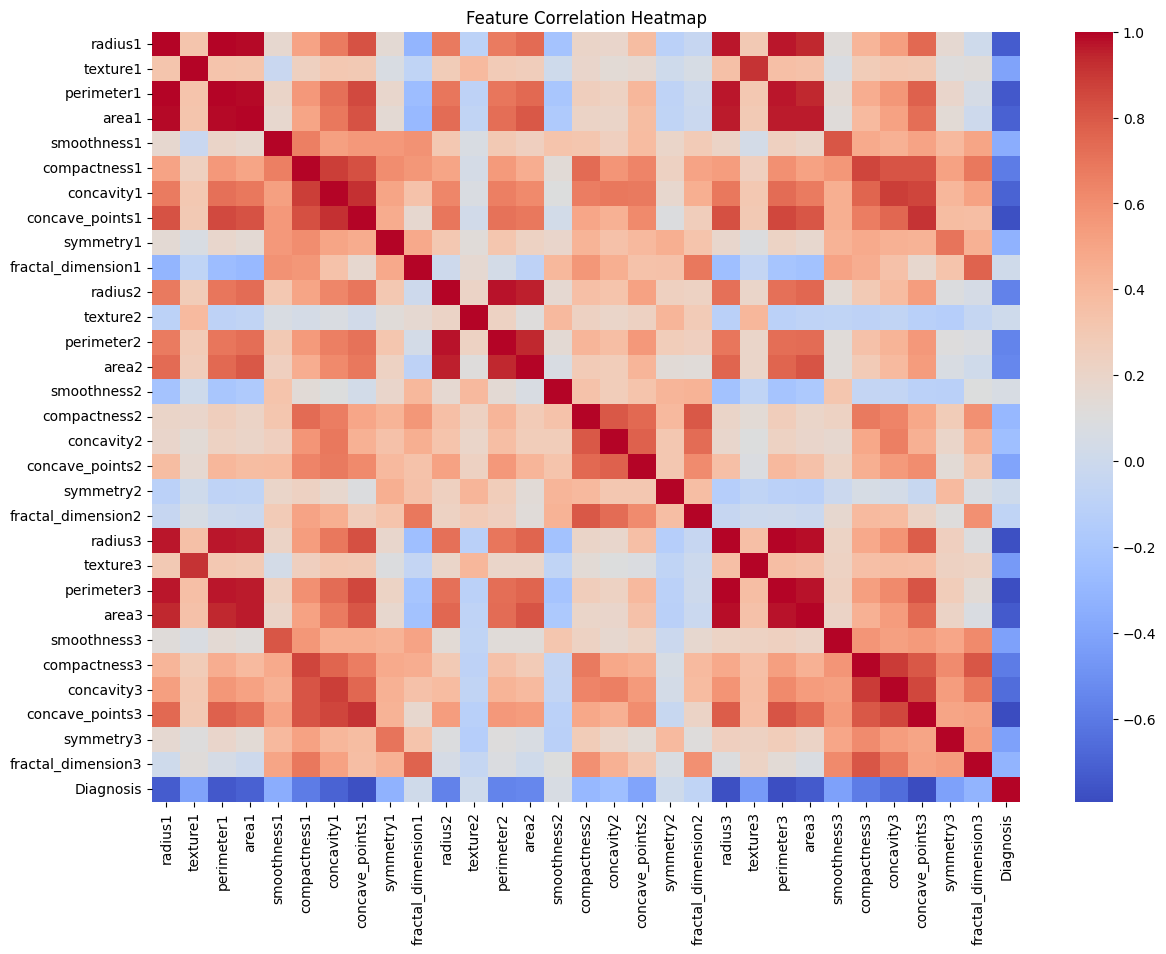

In [10]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr() , cmap = "coolwarm" , annot = False)
plt.title("Feature Correlation Heatmap")
plt.show()

/tmp/ipython-input-1013673860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.head(10).values , y = corr_with_target.head(10).index , palette = 'crest')


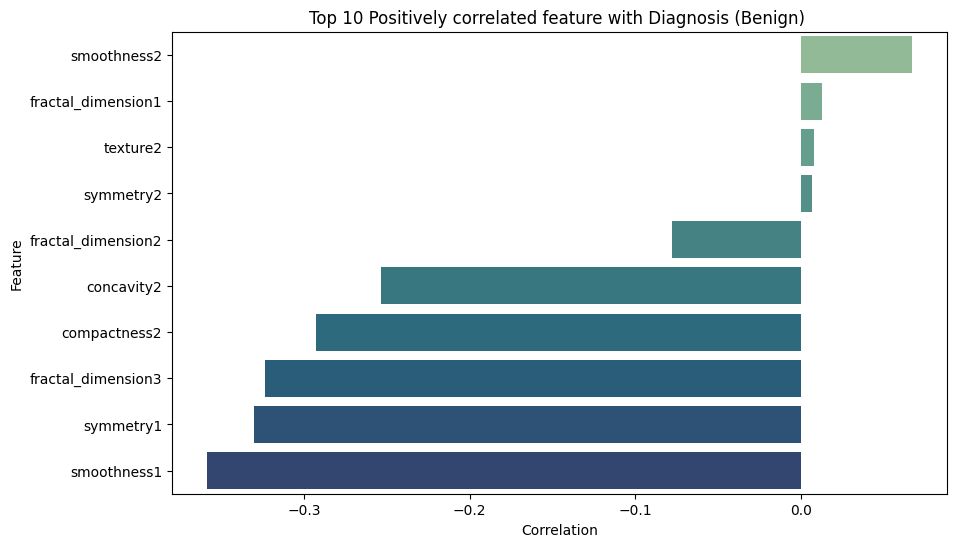

In [11]:
corr_with_target = df.corr()['Diagnosis'].drop('Diagnosis').sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=corr_with_target.head(10).values , y = corr_with_target.head(10).index , palette = 'crest')
plt.title("Top 10 Positively correlated feature with Diagnosis (Benign) ")
plt.xlabel('Correlation')
plt.ylabel('Feature')

plt.show()

/tmp/ipython-input-4112400713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = corr_with_target.tail(10).values, y = corr_with_target.tail(10).index , palette = 'flare' )


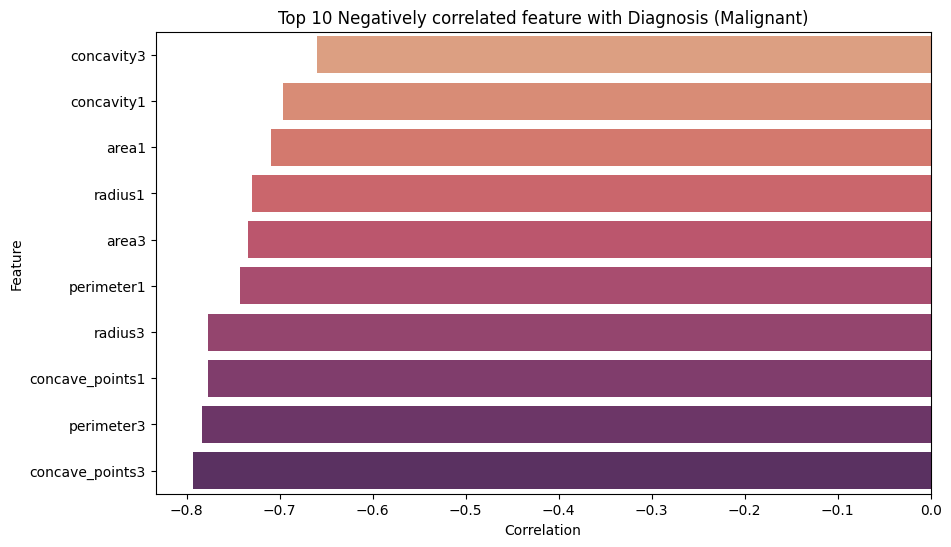

In [12]:
plt.figure(figsize = (10,6))

sns.barplot(x = corr_with_target.tail(10).values, y = corr_with_target.tail(10).index , palette = 'flare' )
plt.title("Top 10 Negatively correlated feature with Diagnosis (Malignant)")
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize Scaler


X["area_ratio"] = X['area3'] / X['area1']

scaler  = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X) , columns= X.columns)

# display(X_scaled.head())


# X_scaled['area_ratio'] = X["area_ratio"]


display(X_scaled[['area_ratio']].head())



/tmp/ipython-input-3655298941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["area_ratio"] = X['area3'] / X['area1']


,area_ratio
0,3.842964
1,0.942515
2,0.650805
3,0.916990
4,-0.453313


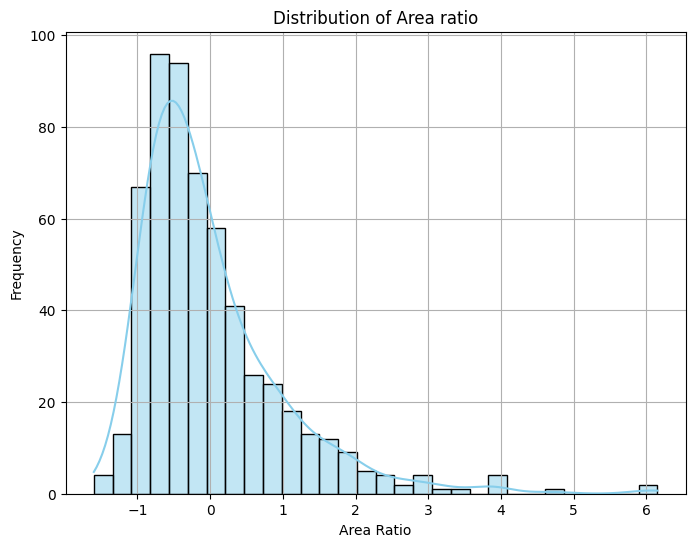

In [14]:
plt.figure(figsize = (8,6))
sns.histplot(X_scaled['area_ratio'] , kde = True , bins = 30 , color = 'skyblue')
plt.title("Distribution of Area ratio")
plt.xlabel("Area Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [15]:
# Convert values of diagnosis in the binary

y_binary = Y.replace({'M' : 1  , 'B' : 0})

print(y_binary.value_counts())

display(y_binary)

Diagnosis
0            357
1            212
Name: count, dtype: int64


/tmp/ipython-input-4098111065.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_binary = Y.replace({'M' : 1  , 'B' : 0})


,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


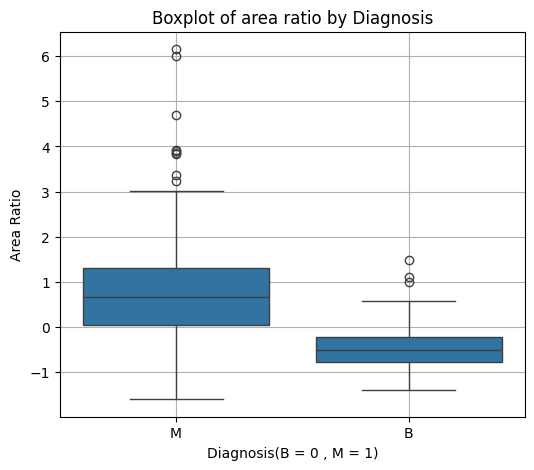

In [16]:
X_scaled_with_target = X_scaled.copy()
X_scaled_with_target['target'] =  Y
X_scaled_with_target['diagnosis_binary'] = y_binary


plt.figure(figsize = (6,5))

sns.boxplot(data = X_scaled_with_target , x = 'target' , y = 'area_ratio')
plt.title("Boxplot of area ratio by Diagnosis")
plt.xlabel("Diagnosis(B = 0 , M = 1)")
plt.ylabel("Area Ratio")
plt.grid(True)
plt.show()



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score , roc_auc_score





In [18]:
# Lets start splitting data


X_train , X_test , Y_train , Y_test = train_test_split(X_scaled , y_binary , test_size = 0.2 , random_state = 42 , stratify = y_binary)


log_reg = LogisticRegression(max_iter = 1000 , random_state = 42)
ran_cls = RandomForestClassifier(random_state = 42)


log_reg.fit(X_train , Y_train)
ran_cls.fit(X_train , Y_train)

log_pred = log_reg.predict(X_test)
ran_pred = ran_cls.predict(X_test)

log_probs = log_reg.predict_proba(X_test)[:,1]
ran_probs = ran_cls.predict_proba(X_test)[:,1]

#

def evaluate_model(name , y_true , y_pred , y_proba):
  print(f"----{name}----")
  print(f"Accuracy : " , accuracy_score(y_true , y_pred))
  print(f"Precision : " , precision_score(y_true , y_pred))
  print(f"Recall : " , recall_score(y_true , y_pred))
  print(f"RoC-AUC Score : " , roc_auc_score(y_true , y_proba))
  print()


evaluate_model("Logistic Regression " , Y_test , log_pred , log_probs)
evaluate_model("Random Forest Classification " , Y_test , ran_pred , ran_probs)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


----Logistic Regression ----
Accuracy :  0.9736842105263158
Precision :  0.975609756097561
Recall :  0.9523809523809523
RoC-AUC Score :  0.9970238095238095

----Random Forest Classification ----
Accuracy :  0.9736842105263158
Precision :  1.0
Recall :  0.9285714285714286
RoC-AUC Score :  0.9958664021164022



In [19]:
#Import roc-curve plot

In [20]:
from sklearn.metrics import roc_curve

In [21]:
log_fpr , log_tpr , _ = roc_curve(Y_test , log_probs)
ran_fpr , ran_tpr , _ = roc_curve(Y_test , ran_probs)


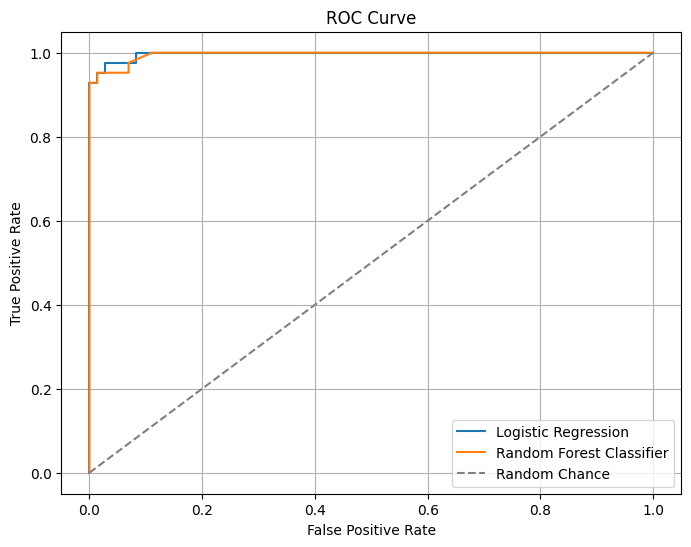

In [22]:
plt.figure(figsize = (8,6))

plt.plot(log_fpr , log_tpr , label = "Logistic Regression")
plt.plot(ran_fpr , ran_tpr , label = "Random Forest Classifier")

plt.plot([0,1],[0,1] , linestyle = "--", color="gray" , label = "Random Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    'n_estimators' : [50,100,150],
    'max_depth' : [None , 10]
}

In [25]:
grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state = 42) ,
    param_grid =  param_grid ,
    cv = 5 ,
    scoring = 'roc_auc' ,
    n_jobs = -1,
    verbose = 1
)


In [26]:
grid_search.fit(X_train , Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=1)

In [27]:
print("Best Parameters :" , grid_search.best_params_)
print("Best CV ROC-AUC Score : " , grid_search.best_score_)

Best Parameters : {'max_depth': None, 'n_estimators': 150}
Best CV ROC-AUC Score :  0.9880804953560371


In [28]:
!pip install joblib

In [29]:
import joblib

joblib.dump(grid_search.best_estimator_ , "best_model.pkl")


['best_model.pkl']

In [30]:
loaded_model = joblib.load("best_model.pkl")
loaded_model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [31]:
joblib.dump(scaler , "scaler.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [32]:
import joblib
import json
import numpy as np

# Load the serialized model and scaler

In [33]:

# for importing data of 1 row into sample value we will create an
#  input.json which will be easier to load
import json

sample_dict = X.iloc[0].to_dict()

with open("sample_input.json" , "w") as f:
  json.dump(sample_dict , f, indent = 2)

print(json.dumps(sample_dict , indent = 2))



{
  "radius1": 17.99,
  "texture1": 10.38,
  "perimeter1": 122.8,
  "area1": 1001.0,
  "smoothness1": 0.1184,
  "compactness1": 0.2776,
  "concavity1": 0.3001,
  "concave_points1": 0.1471,
  "symmetry1": 0.2419,
  "fractal_dimension1": 0.07871,
  "radius2": 1.095,
  "texture2": 0.9053,
  "perimeter2": 8.589,
  "area2": 153.4,
  "smoothness2": 0.006399,
  "compactness2": 0.04904,
  "concavity2": 0.05373,
  "concave_points2": 0.01587,
  "symmetry2": 0.03003,
  "fractal_dimension2": 0.006193,
  "radius3": 25.38,
  "texture3": 17.33,
  "perimeter3": 184.6,
  "area3": 2019.0,
  "smoothness3": 0.1622,
  "compactness3": 0.6656,
  "concavity3": 0.7119,
  "concave_points3": 0.2654,
  "symmetry3": 0.4601,
  "fractal_dimension3": 0.1189,
  "area_ratio": 2.016983016983017
}


In [34]:


model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

with open("sample_input.json" , "r") as file:
  input_dict = json.load(file)



In [35]:


# Parse json string in the dictionary

input_df = pd.DataFrame([input_dict])  # preserves column names
input_scaled = scaler.transform(input_df)  # still a numpy array, but input_df has names

input_scaled_df = pd.DataFrame(input_scaled, columns=input_df.columns)


prediction = model.predict(input_scaled)[0]
probability = model.predict_proba(input_scaled)[0][1]

# Print the results

result = "Malignant" if prediction == 1 else "Benign"
print(f"Predicted Class : {prediction}")
print(f"Probability of being malignant : {probability:.4f}")


Predicted Class : 1
Probability of being malignant : 0.9400


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [36]:
# Model Evaluation

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import joblib

# Load model
model = joblib.load("best_model.pkl")

# Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("Random Forest (Final)", Y_test, y_pred, y_proba)


----Random Forest (Final)----
Accuracy :  0.9736842105263158
Precision :  1.0
Recall :  0.9285714285714286
RoC-AUC Score :  0.9950396825396826

